In [1]:
!pip install tensorflow

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
  Using cached flatbuffers-22.10.26-py2.py3-none-any.whl (26 kB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached termcolor-2.1.1-py3-none-any.whl (6.2 kB)


In [2]:
!pip install keras

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from keras.models import Sequential
from keras.layers import Dense

In [5]:
# importing dataset

data=pd.read_csv("forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# Performing EDA & Visualization on dataset

In [6]:
# Geting Information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
# Descriptive Satistics

data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [8]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
data1=data.copy()
data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [10]:
data1[data1.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [11]:
data1["month"].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [12]:
data1["day"].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [13]:
from sklearn import preprocessing

In [14]:
# Checking Correlation between numerical function
data1=data[["month","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain","area","size_category"]]
data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [15]:
cor=data1.corr()
cor

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


<AxesSubplot:>

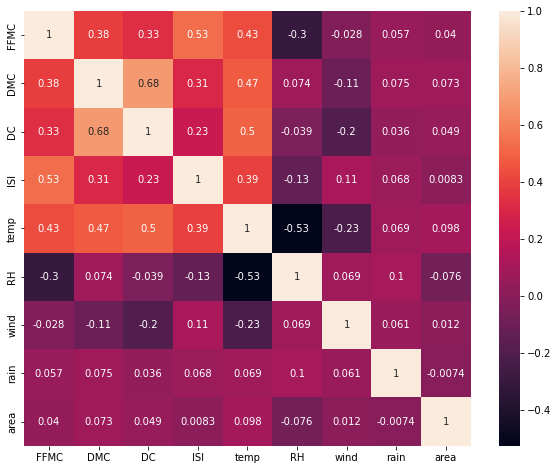

In [16]:
# creating heatmap by use of correlation

plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)

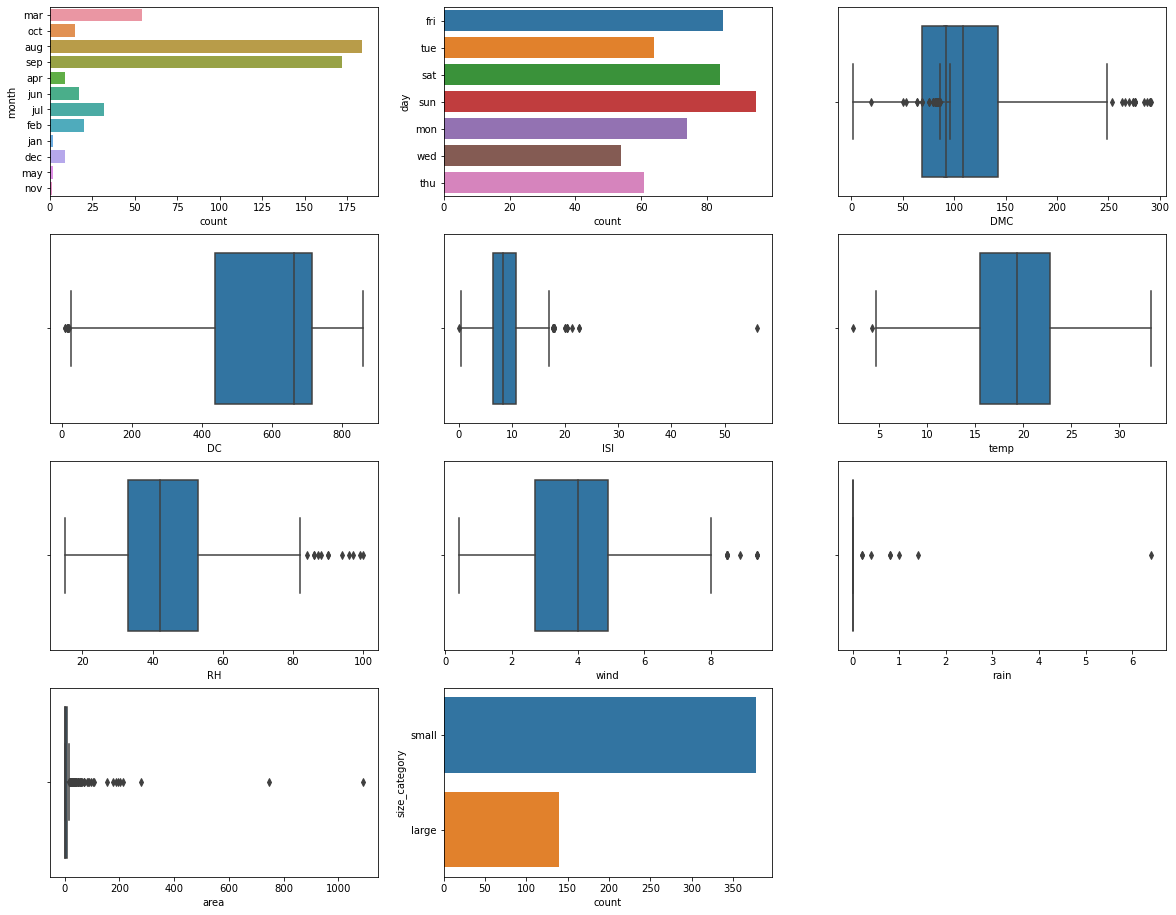

In [17]:
# Ploting Count plot
plt.subplots(figsize=(20,16))
[plt.subplot(4,3,1), sns.countplot(data=data1, y='month')];

[plt.subplot(4,3,2), sns.countplot(data=data1, y='day')];

[plt.subplot(4,3,3), sns.boxplot(x=data1["FFMC"])];

[plt.subplot(4,3,3), sns.boxplot(x=data1["DMC"])];

[plt.subplot(4,3,4), sns.boxplot(x=data1["DC"])];

[plt.subplot(4,3,5), sns.boxplot(x=data1["ISI"])];

[plt.subplot(4,3,6), sns.boxplot(x=data1["temp"])];

[plt.subplot(4,3,7), sns.boxplot(x=data1["RH"])];

[plt.subplot(4,3,8), sns.boxplot(x=data1["wind"])];

[plt.subplot(4,3,9), sns.boxplot(x=data1["rain"])];

[plt.subplot(4,3,10), sns.boxplot(x=data1["area"])]

[plt.subplot(4,3,11), sns.countplot(data=data1, y='size_category')];

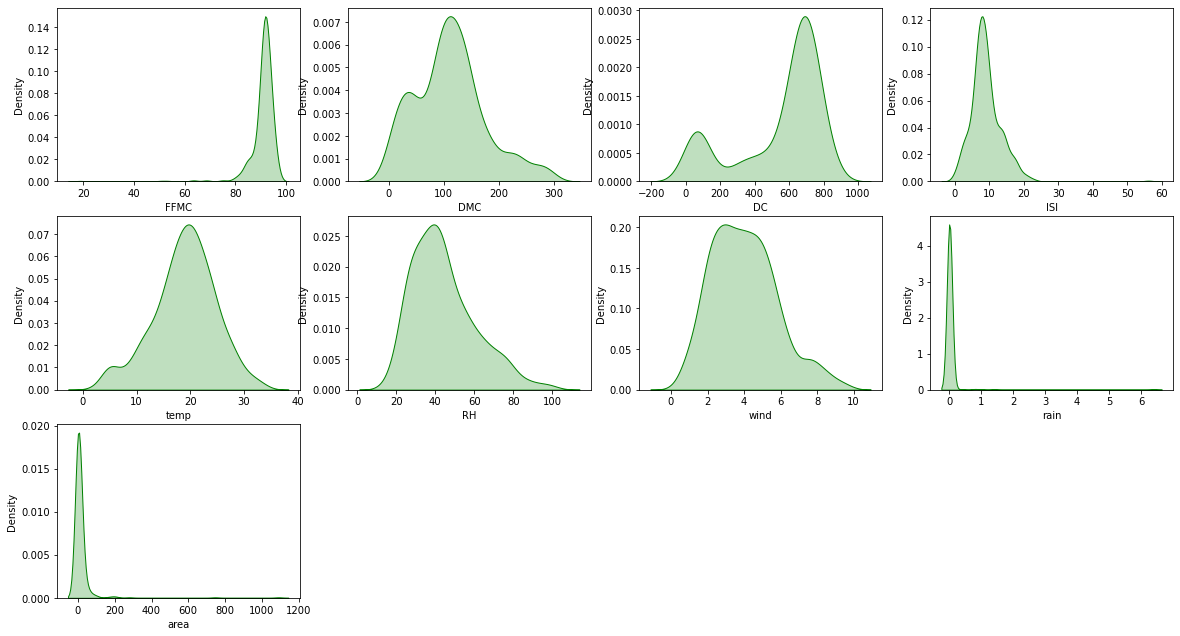

In [18]:
no_columns = data1.select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(20,30))
for i,column in enumerate(no_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data1[column],color='g',shade=True)

Text(0, 0.5, 'Rate')

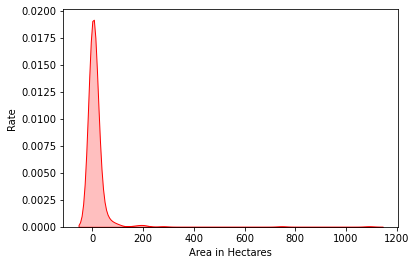

In [19]:
sns.kdeplot(data1['area'],shade=True,color='r')
plt.xlabel('Area in Hectares')
plt.ylabel('Rate')

# Histogram And Boxplot

([<AxesSubplot:title={'center':'v'}>,
  <AxesSubplot:title={'center':'v'}>,
  Text(0.5, 1.0, 'v')],
 [<AxesSubplot:xlabel='FFMC'>, <AxesSubplot:xlabel='FFMC'>])

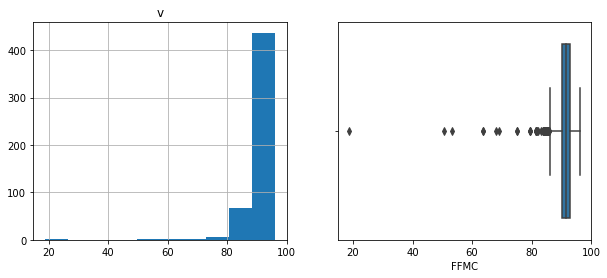

In [20]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['FFMC'].hist(),plt.title("v")],[plt.subplot(1,2,2),sns.boxplot(x=data1["FFMC"])]

([<AxesSubplot:title={'center':'DMC'}>,
  <AxesSubplot:title={'center':'DMC'}>,
  Text(0.5, 1.0, 'DMC')],
 [<AxesSubplot:xlabel='DMC'>, <AxesSubplot:xlabel='DMC'>])

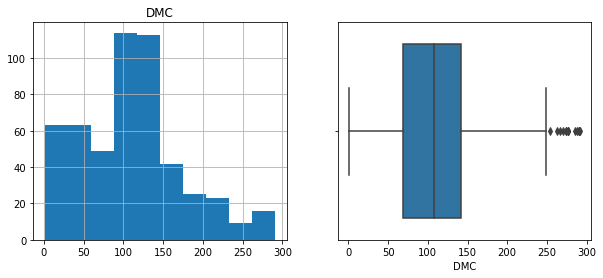

In [21]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['DMC'].hist(),plt.title("DMC")],[plt.subplot(1,2,2),sns.boxplot(x=data1["DMC"])]

([<AxesSubplot:title={'center':'DC'}>,
  <AxesSubplot:title={'center':'DC'}>,
  Text(0.5, 1.0, 'DC')],
 [<AxesSubplot:xlabel='DC'>, <AxesSubplot:xlabel='DC'>])

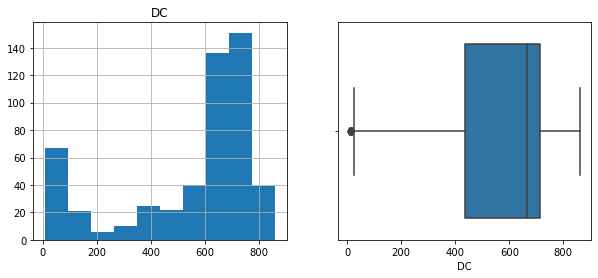

In [22]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['DC'].hist(),plt.title("DC")],[plt.subplot(1,2,2),sns.boxplot(x=data1["DC"])]

([<AxesSubplot:title={'center':'ISI'}>,
  <AxesSubplot:title={'center':'ISI'}>,
  Text(0.5, 1.0, 'ISI')],
 [<AxesSubplot:xlabel='ISI'>, <AxesSubplot:xlabel='ISI'>])

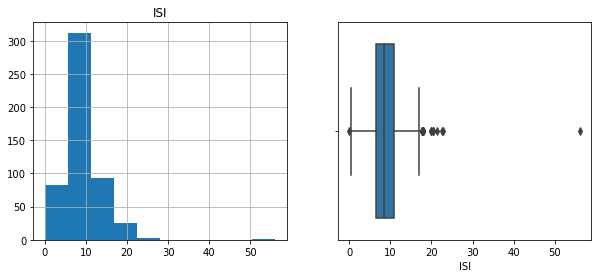

In [23]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['ISI'].hist(),plt.title("ISI")],[plt.subplot(1,2,2),sns.boxplot(x=data1["ISI"])]

([<AxesSubplot:title={'center':'temp'}>,
  <AxesSubplot:title={'center':'temp'}>,
  Text(0.5, 1.0, 'temp')],
 [<AxesSubplot:xlabel='temp'>, <AxesSubplot:xlabel='temp'>])

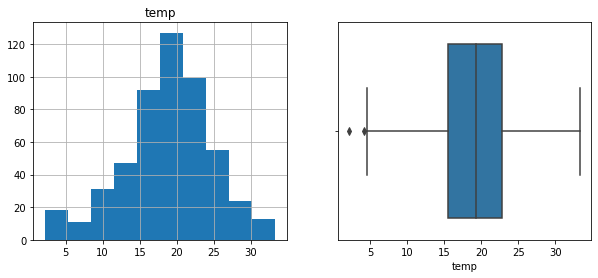

In [24]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['temp'].hist(),plt.title("temp")],[plt.subplot(1,2,2),sns.boxplot(x=data1["temp"])]

([<AxesSubplot:title={'center':'RH'}>,
  <AxesSubplot:title={'center':'RH'}>,
  Text(0.5, 1.0, 'RH')],
 [<AxesSubplot:xlabel='RH'>, <AxesSubplot:xlabel='RH'>])

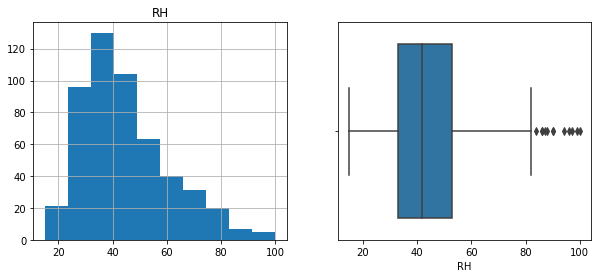

In [25]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['RH'].hist(),plt.title("RH")],[plt.subplot(1,2,2),sns.boxplot(x=data1["RH"])]

([<AxesSubplot:title={'center':'wind'}>,
  <AxesSubplot:title={'center':'wind'}>,
  Text(0.5, 1.0, 'wind')],
 [<AxesSubplot:xlabel='wind'>, <AxesSubplot:xlabel='wind'>])

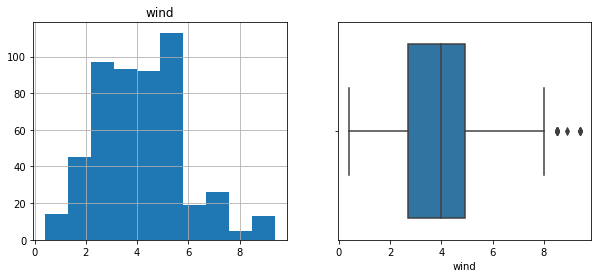

In [26]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['wind'].hist(),plt.title("wind")],[plt.subplot(1,2,2),sns.boxplot(x=data1["wind"])]

([<AxesSubplot:title={'center':'rain'}>,
  <AxesSubplot:title={'center':'rain'}>,
  Text(0.5, 1.0, 'rain')],
 [<AxesSubplot:xlabel='rain'>, <AxesSubplot:xlabel='rain'>])

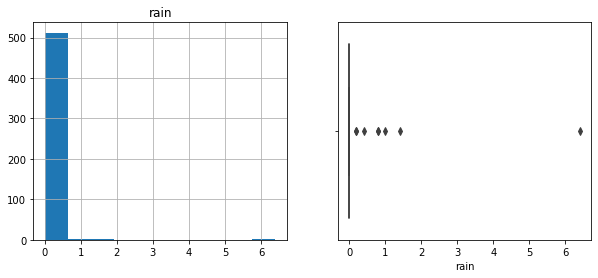

In [28]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['rain'].hist(),plt.title("rain")],[plt.subplot(1,2,2),sns.boxplot(x=data1["rain"])]


([<AxesSubplot:title={'center':'area'}>,
  <AxesSubplot:title={'center':'area'}>,
  Text(0.5, 1.0, 'area')],
 [<AxesSubplot:xlabel='area'>, <AxesSubplot:xlabel='area'>])

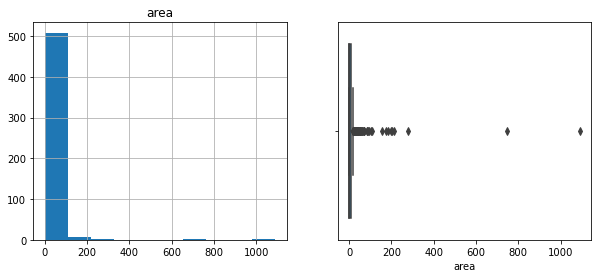

In [29]:
plt.subplots(figsize=(10, 4))

[plt.subplot(1,2,1),data1['area'].hist(),plt.title("area")],[plt.subplot(1,2,2),sns.boxplot(x=data1["area"])]

In [30]:
label_encoder=preprocessing.LabelEncoder()
data['size_category']=label_encoder.fit_transform(data['size_category'])

In [31]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [32]:
x = data.iloc[:,2:11]
y = data['size_category']

In [33]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [34]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [35]:
# fix random seed for reproducibility
seed = 9
np.random.seed(seed)

In [36]:
# creating model with ["relu" and "sigmoid"]

model = Sequential() # 0 level
model.add(Dense(12, input_dim=9,  activation='relu')) #1st layer
model.add(Dense(8,  activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [37]:
# Compile model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model

In [38]:
# Fit the model

fil_model=model.fit(x, y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 4s 12ms/step - loss: 13.6372 - accuracy: 0.6763 - val_loss: 7.3723 - val_accuracy: 0.6199
Epoch 2/250
35/35 [==============================] - 0s 2ms/step - loss: 4.3227 - accuracy: 0.6156 - val_loss: 6.0104 - val_accuracy: 0.5380
Epoch 3/250
35/35 [==============================] - 0s 3ms/step - loss: 2.9549 - accuracy: 0.6590 - val_loss: 7.8701 - val_accuracy: 0.4386
Epoch 4/250
35/35 [==============================] - 0s 3ms/step - loss: 2.4176 - accuracy: 0.6850 - val_loss: 5.2265 - val_accuracy: 0.5088
Epoch 5/250
35/35 [==============================] - 0s 3ms/step - loss: 2.1341 - accuracy: 0.6936 - val_loss: 5.3637 - val_accuracy: 0.4561
Epoch 6/250
35/35 [==============================] - 0s 3ms/step - loss: 1.7594 - accuracy: 0.6994 - val_loss: 3.0476 - val_accuracy: 0.5614
Epoch 7/250
35/35 [==============================] - 0s 3ms/step - loss: 1.3330 - accuracy: 0.7601 - val_loss: 2.3535 - val_accuracy: 0.5731
Epoch 8/250

Epoch 59/250
35/35 [==============================] - 0s 3ms/step - loss: 0.1195 - accuracy: 0.9624 - val_loss: 0.1460 - val_accuracy: 0.9240
Epoch 60/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0912 - accuracy: 0.9740 - val_loss: 0.1529 - val_accuracy: 0.9240
Epoch 61/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.9855 - val_loss: 0.1291 - val_accuracy: 0.9591
Epoch 62/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0868 - accuracy: 0.9769 - val_loss: 0.2695 - val_accuracy: 0.8772
Epoch 63/250
35/35 [==============================] - 0s 4ms/step - loss: 0.1525 - accuracy: 0.9480 - val_loss: 0.1275 - val_accuracy: 0.9591
Epoch 64/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0904 - accuracy: 0.9798 - val_loss: 0.1596 - val_accuracy: 0.9181
Epoch 65/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0805 - accuracy: 0.9798 - val_loss: 0.1337 - val_accuracy: 0.9766
Epoch 

35/35 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9798 - val_loss: 0.1028 - val_accuracy: 0.9591
Epoch 174/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9855 - val_loss: 0.1022 - val_accuracy: 0.9532
Epoch 175/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9827 - val_loss: 0.1142 - val_accuracy: 0.9591
Epoch 176/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9884 - val_loss: 0.1699 - val_accuracy: 0.9298
Epoch 177/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0809 - accuracy: 0.9711 - val_loss: 0.4888 - val_accuracy: 0.8421
Epoch 178/250
35/35 [==============================] - 0s 3ms/step - loss: 0.1271 - accuracy: 0.9624 - val_loss: 0.3028 - val_accuracy: 0.9006
Epoch 179/250
35/35 [==============================] - 0s 3ms/step - loss: 0.1005 - accuracy: 0.9711 - val_loss: 0.1924 - val_accuracy: 0.9357
Epoch 180/250

In [38]:
# Fit the model

fil_model=model.fit(x, y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 4s 12ms/step - loss: 13.6372 - accuracy: 0.6763 - val_loss: 7.3723 - val_accuracy: 0.6199
Epoch 2/250
35/35 [==============================] - 0s 2ms/step - loss: 4.3227 - accuracy: 0.6156 - val_loss: 6.0104 - val_accuracy: 0.5380
Epoch 3/250
35/35 [==============================] - 0s 3ms/step - loss: 2.9549 - accuracy: 0.6590 - val_loss: 7.8701 - val_accuracy: 0.4386
Epoch 4/250
35/35 [==============================] - 0s 3ms/step - loss: 2.4176 - accuracy: 0.6850 - val_loss: 5.2265 - val_accuracy: 0.5088
Epoch 5/250
35/35 [==============================] - 0s 3ms/step - loss: 2.1341 - accuracy: 0.6936 - val_loss: 5.3637 - val_accuracy: 0.4561
Epoch 6/250
35/35 [==============================] - 0s 3ms/step - loss: 1.7594 - accuracy: 0.6994 - val_loss: 3.0476 - val_accuracy: 0.5614
Epoch 7/250
35/35 [==============================] - 0s 3ms/step - loss: 1.3330 - accuracy: 0.7601 - val_loss: 2.3535 - val_accuracy: 0.5731
Epoch 8/250

Epoch 59/250
35/35 [==============================] - 0s 3ms/step - loss: 0.1195 - accuracy: 0.9624 - val_loss: 0.1460 - val_accuracy: 0.9240
Epoch 60/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0912 - accuracy: 0.9740 - val_loss: 0.1529 - val_accuracy: 0.9240
Epoch 61/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0908 - accuracy: 0.9855 - val_loss: 0.1291 - val_accuracy: 0.9591
Epoch 62/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0868 - accuracy: 0.9769 - val_loss: 0.2695 - val_accuracy: 0.8772
Epoch 63/250
35/35 [==============================] - 0s 4ms/step - loss: 0.1525 - accuracy: 0.9480 - val_loss: 0.1275 - val_accuracy: 0.9591
Epoch 64/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0904 - accuracy: 0.9798 - val_loss: 0.1596 - val_accuracy: 0.9181
Epoch 65/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0805 - accuracy: 0.9798 - val_loss: 0.1337 - val_accuracy: 0.9766
Epoch 

35/35 [==============================] - 0s 3ms/step - loss: 0.0841 - accuracy: 0.9595 - val_loss: 0.2095 - val_accuracy: 0.9240
Epoch 117/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0815 - accuracy: 0.9682 - val_loss: 0.1437 - val_accuracy: 0.9474
Epoch 118/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9884 - val_loss: 0.1379 - val_accuracy: 0.9474
Epoch 119/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9769 - val_loss: 0.1093 - val_accuracy: 0.9532
Epoch 120/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9913 - val_loss: 0.1141 - val_accuracy: 0.9474
Epoch 121/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9913 - val_loss: 0.1025 - val_accuracy: 0.9649
Epoch 122/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.9740 - val_loss: 0.1036 - val_accuracy: 0.9649
Epoch 123/250

35/35 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9798 - val_loss: 0.1028 - val_accuracy: 0.9591
Epoch 174/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0608 - accuracy: 0.9855 - val_loss: 0.1022 - val_accuracy: 0.9532
Epoch 175/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9827 - val_loss: 0.1142 - val_accuracy: 0.9591
Epoch 176/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9884 - val_loss: 0.1699 - val_accuracy: 0.9298
Epoch 177/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0809 - accuracy: 0.9711 - val_loss: 0.4888 - val_accuracy: 0.8421
Epoch 178/250
35/35 [==============================] - 0s 3ms/step - loss: 0.1271 - accuracy: 0.9624 - val_loss: 0.3028 - val_accuracy: 0.9006
Epoch 179/250
35/35 [==============================] - 0s 3ms/step - loss: 0.1005 - accuracy: 0.9711 - val_loss: 0.1924 - val_accuracy: 0.9357
Epoch 180/250

35/35 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9942 - val_loss: 0.1039 - val_accuracy: 0.9591
Epoch 231/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9913 - val_loss: 0.1312 - val_accuracy: 0.9591
Epoch 232/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9855 - val_loss: 0.0933 - val_accuracy: 0.9532
Epoch 233/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9884 - val_loss: 0.2258 - val_accuracy: 0.9240
Epoch 234/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9798 - val_loss: 0.1617 - val_accuracy: 0.9474
Epoch 235/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9827 - val_loss: 0.0894 - val_accuracy: 0.9532
Epoch 236/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9913 - val_loss: 0.1039 - val_accuracy: 0.9649
Epoch 237/250

In [39]:
# Evaluating the Model

score = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9749
accuracy: 97.49%


In [41]:
model.metrics_names, score 

(['loss', 'accuracy'], [0.07093364745378494, 0.9748549461364746])

In [42]:
# Visualzation of Training History

fil_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [43]:
fil_model.history['accuracy']  # just for understand

[0.9971098303794861,
 0.9797688126564026,
 0.9797688126564026,
 0.9797688126564026,
 0.9826589822769165,
 0.9710982441902161,
 0.9884393215179443,
 0.9971098303794861,
 0.9855491518974304,
 0.9913294911384583,
 0.9768785834312439,
 0.9971098303794861,
 0.9768785834312439,
 0.9913294911384583,
 0.9884393215179443,
 0.9855491518974304,
 0.9884393215179443,
 0.9884393215179443,
 0.9913294911384583,
 0.9884393215179443,
 0.9884393215179443,
 0.9884393215179443,
 0.9797688126564026,
 0.9942196607589722,
 0.9942196607589722,
 0.9884393215179443,
 0.9855491518974304,
 0.9884393215179443,
 0.9797688126564026,
 0.9942196607589722,
 0.9913294911384583,
 0.9942196607589722,
 0.9942196607589722,
 0.9826589822769165,
 0.9913294911384583,
 0.9855491518974304,
 0.9942196607589722,
 0.9971098303794861,
 0.9942196607589722,
 0.9971098303794861,
 0.97398841381073,
 0.9884393215179443,
 0.9942196607589722,
 0.9971098303794861,
 0.9826589822769165,
 0.9913294911384583,
 0.9971098303794861,
 0.968208074569

In [45]:
fil_model.history['val_accuracy']  # just for understand

[0.9298245906829834,
 0.9415204524993896,
 0.9298245906829834,
 0.9590643048286438,
 0.9298245906829834,
 0.9298245906829834,
 0.9473684430122375,
 0.9473684430122375,
 0.9532163739204407,
 0.9415204524993896,
 0.9590643048286438,
 0.9473684430122375,
 0.9473684430122375,
 0.9239766001701355,
 0.9415204524993896,
 0.9532163739204407,
 0.9415204524993896,
 0.9415204524993896,
 0.9473684430122375,
 0.9415204524993896,
 0.9590643048286438,
 0.9473684430122375,
 0.9532163739204407,
 0.9415204524993896,
 0.9415204524993896,
 0.9239766001701355,
 0.9356725215911865,
 0.9239766001701355,
 0.9415204524993896,
 0.9532163739204407,
 0.9649122953414917,
 0.9590643048286438,
 0.9590643048286438,
 0.9590643048286438,
 0.9473684430122375,
 0.9590643048286438,
 0.9532163739204407,
 0.9532163739204407,
 0.9649122953414917,
 0.9649122953414917,
 0.9473684430122375,
 0.9356725215911865,
 0.9590643048286438,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9532163739204407,
 0.9590643048

In [46]:
fil_model.history['loss']  # just for understand

[0.013591007329523563,
 0.04377521947026253,
 0.06233687326312065,
 0.03792534023523331,
 0.04379071667790413,
 0.08326199650764465,
 0.056824371218681335,
 0.015803620219230652,
 0.024127816781401634,
 0.020888574421405792,
 0.05679862201213837,
 0.01520686037838459,
 0.05614883825182915,
 0.023678887635469437,
 0.02418387494981289,
 0.027650102972984314,
 0.020927604287862778,
 0.026624485850334167,
 0.034941788762807846,
 0.04723472148180008,
 0.027329860255122185,
 0.02701166644692421,
 0.029441064223647118,
 0.019220147281885147,
 0.015667162835597992,
 0.03011476993560791,
 0.024379398673772812,
 0.03041175939142704,
 0.04621089622378349,
 0.02092801406979561,
 0.02274749055504799,
 0.01693548820912838,
 0.019739989191293716,
 0.03254887834191322,
 0.020149322226643562,
 0.03334342688322067,
 0.01967751793563366,
 0.016151748597621918,
 0.01582634262740612,
 0.013632159680128098,
 0.06254144012928009,
 0.023485885933041573,
 0.018338894471526146,
 0.01828809082508087,
 0.03395858

In [47]:
fil_model.history['val_loss']  # just for understand

[0.2265872359275818,
 0.13209137320518494,
 0.2094549685716629,
 0.13029557466506958,
 0.24230480194091797,
 0.15730330348014832,
 0.1165153980255127,
 0.15061533451080322,
 0.11222445964813232,
 0.1694703996181488,
 0.12537746131420135,
 0.1390189379453659,
 0.1233387216925621,
 0.26767006516456604,
 0.1443653553724289,
 0.12208990752696991,
 0.11053381860256195,
 0.11768107861280441,
 0.11005976796150208,
 0.12435483932495117,
 0.12757377326488495,
 0.19878675043582916,
 0.1226973608136177,
 0.1405154913663864,
 0.17012891173362732,
 0.27627354860305786,
 0.22103621065616608,
 0.28415995836257935,
 0.12880639731884003,
 0.10223276168107986,
 0.10628408938646317,
 0.1076260358095169,
 0.11649354547262192,
 0.12252828478813171,
 0.17822884023189545,
 0.1186390146613121,
 0.08815552294254303,
 0.09561979025602341,
 0.12464640289545059,
 0.11855950951576233,
 0.12569911777973175,
 0.2367352694272995,
 0.11599091440439224,
 0.14699822664260864,
 0.1521359384059906,
 0.10262312740087509,
 

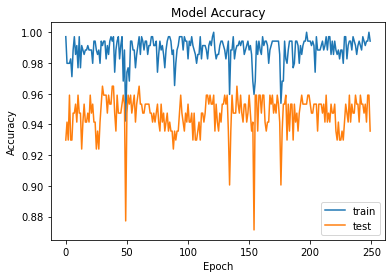

In [48]:
# # summarizaion of history for accuracy

plt.plot(fil_model.history['accuracy'])
plt.plot(fil_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

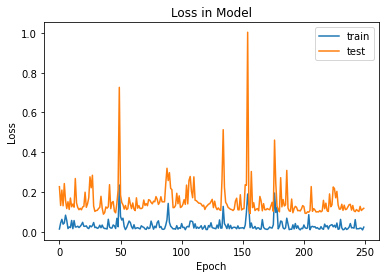

In [49]:
# # summarization of history for 'loss'

plt.plot(fil_model.history['loss'])
plt.plot(fil_model.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [50]:
predictions = model.predict(x)

17/17 [==============================] - 3s 1ms/step


# Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [51]:
# fix random seed for reproducibility
seed2 = 9
np.random.seed(seed2)

In [52]:
# creating model with ["linear" and "sigmoid"]

model2 = Sequential() # 0 level
model2.add(Dense(14, input_dim=9,  activation='linear')) #1st layer
model2.add(Dense(9,  activation='linear')) #2nd layer
model2.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [53]:
# Compile model
# chaging optimizer older=ada, new=adadelta

model2.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model2

In [54]:
# Fit the model
# Change ephocs from 250 to 200

fil_model2=model2.fit(x, y, validation_split=0.33, epochs=200, batch_size=10)

Epoch 1/200
35/35 [==============================] - 1s 8ms/step - loss: 64.9660 - accuracy: 0.7428 - val_loss: 99.2274 - val_accuracy: 0.6433
Epoch 2/200
35/35 [==============================] - 0s 4ms/step - loss: 64.8542 - accuracy: 0.7428 - val_loss: 99.0597 - val_accuracy: 0.6433
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 64.7413 - accuracy: 0.7428 - val_loss: 98.8848 - val_accuracy: 0.6433
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 64.6241 - accuracy: 0.7428 - val_loss: 98.7069 - val_accuracy: 0.6433
Epoch 5/200
35/35 [==============================] - 0s 4ms/step - loss: 64.5044 - accuracy: 0.7428 - val_loss: 98.5274 - val_accuracy: 0.6433
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 64.3854 - accuracy: 0.7428 - val_loss: 98.3472 - val_accuracy: 0.6433
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 64.2653 - accuracy: 0.7399 - val_loss: 98.1622 - val_accuracy: 0.6433

Epoch 58/200
35/35 [==============================] - 0s 3ms/step - loss: 58.0035 - accuracy: 0.7312 - val_loss: 88.7279 - val_accuracy: 0.6316
Epoch 59/200
35/35 [==============================] - 0s 3ms/step - loss: 57.8801 - accuracy: 0.7312 - val_loss: 88.5451 - val_accuracy: 0.6316
Epoch 60/200
35/35 [==============================] - 0s 3ms/step - loss: 57.7603 - accuracy: 0.7312 - val_loss: 88.3615 - val_accuracy: 0.6316
Epoch 61/200
35/35 [==============================] - 0s 3ms/step - loss: 57.6375 - accuracy: 0.7312 - val_loss: 88.1786 - val_accuracy: 0.6316
Epoch 62/200
35/35 [==============================] - 0s 3ms/step - loss: 57.5154 - accuracy: 0.7312 - val_loss: 87.9928 - val_accuracy: 0.6316
Epoch 63/200
35/35 [==============================] - 0s 3ms/step - loss: 57.3924 - accuracy: 0.7312 - val_loss: 87.8066 - val_accuracy: 0.6316
Epoch 64/200
35/35 [==============================] - 0s 4ms/step - loss: 57.2698 - accuracy: 0.7283 - val_loss: 87.6202 - val_accuracy:

Epoch 115/200
35/35 [==============================] - 0s 3ms/step - loss: 51.2595 - accuracy: 0.6908 - val_loss: 78.4862 - val_accuracy: 0.6082
Epoch 116/200
35/35 [==============================] - 0s 3ms/step - loss: 51.1450 - accuracy: 0.6908 - val_loss: 78.3090 - val_accuracy: 0.6082
Epoch 117/200
35/35 [==============================] - 0s 3ms/step - loss: 51.0302 - accuracy: 0.6879 - val_loss: 78.1279 - val_accuracy: 0.6082
Epoch 118/200
35/35 [==============================] - 0s 4ms/step - loss: 50.9142 - accuracy: 0.6850 - val_loss: 77.9547 - val_accuracy: 0.6082
Epoch 119/200
35/35 [==============================] - 0s 3ms/step - loss: 50.8002 - accuracy: 0.6821 - val_loss: 77.7781 - val_accuracy: 0.6082
Epoch 120/200
35/35 [==============================] - 0s 3ms/step - loss: 50.6867 - accuracy: 0.6821 - val_loss: 77.5993 - val_accuracy: 0.6082
Epoch 121/200
35/35 [==============================] - 0s 3ms/step - loss: 50.5703 - accuracy: 0.6821 - val_loss: 77.4230 - val_ac

35/35 [==============================] - 0s 3ms/step - loss: 44.8362 - accuracy: 0.6705 - val_loss: 68.4777 - val_accuracy: 0.6023
Epoch 172/200
35/35 [==============================] - 0s 4ms/step - loss: 44.7261 - accuracy: 0.6676 - val_loss: 68.3000 - val_accuracy: 0.6023
Epoch 173/200
35/35 [==============================] - 0s 3ms/step - loss: 44.6140 - accuracy: 0.6676 - val_loss: 68.1258 - val_accuracy: 0.6023
Epoch 174/200
35/35 [==============================] - 0s 3ms/step - loss: 44.5028 - accuracy: 0.6676 - val_loss: 67.9494 - val_accuracy: 0.6023
Epoch 175/200
35/35 [==============================] - 0s 3ms/step - loss: 44.3931 - accuracy: 0.6676 - val_loss: 67.7778 - val_accuracy: 0.6023
Epoch 176/200
35/35 [==============================] - 0s 3ms/step - loss: 44.2834 - accuracy: 0.6676 - val_loss: 67.6042 - val_accuracy: 0.6023
Epoch 177/200
35/35 [==============================] - 0s 3ms/step - loss: 44.1725 - accuracy: 0.6676 - val_loss: 67.4269 - val_accuracy: 0.6023

In [55]:
# Evaluating the Model

score2 = model2.evaluate(x, y)
print("%s: %.2f%%" % (model2.metrics_names[1], score2[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 48.8330 - accuracy: 0.6422
accuracy: 64.22%


In [56]:
# Visualzation of Training History, metric name and score

model2.metrics_names, score2 , fil_model2.history.keys()

(['loss', 'accuracy'],
 [48.83298110961914, 0.6421663165092468],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

In [57]:
fil_model2.history['accuracy'] # just for understanding

[0.7427745461463928,
 0.7427745461463928,
 0.7427745461463928,
 0.7427745461463928,
 0.7427745461463928,
 0.7427745461463928,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7398843765258789,
 0.7341040372848511,
 0.7341040372848511,
 0.7341040372848511,
 0.7341040372848511,
 0.7341040372848511,
 0.7341040372848511,
 0.7341040372848511,
 0.7341040372848511,
 0.7341040372848511,
 0.7341040372848511,
 0.7341040372848511,
 0.7341040372

In [58]:
fil_model2.history['val_accuracy']  # just for understanding

[0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6432748436927795,
 0.6374269127845764,
 0.6374269127845764,
 0.6315789222717285,
 0.6315789222717285,
 0.6315789222717285,
 0.6315789222717285,
 0.6315789222717285,
 0.6315789222717285,
 0.6315789222717285,
 0.6315789222717285,
 0.6315789222717285,
 0.6315789222717285,
 0.6315789222717285,
 0.6315789222717285,
 0.6315789222717285,
 0.6315789222717285,
 0.6315789222717285,
 0.6315789222717285,
 0.6315789222

In [59]:
fil_model.history['loss']  # just for understanding

[0.013591007329523563,
 0.04377521947026253,
 0.06233687326312065,
 0.03792534023523331,
 0.04379071667790413,
 0.08326199650764465,
 0.056824371218681335,
 0.015803620219230652,
 0.024127816781401634,
 0.020888574421405792,
 0.05679862201213837,
 0.01520686037838459,
 0.05614883825182915,
 0.023678887635469437,
 0.02418387494981289,
 0.027650102972984314,
 0.020927604287862778,
 0.026624485850334167,
 0.034941788762807846,
 0.04723472148180008,
 0.027329860255122185,
 0.02701166644692421,
 0.029441064223647118,
 0.019220147281885147,
 0.015667162835597992,
 0.03011476993560791,
 0.024379398673772812,
 0.03041175939142704,
 0.04621089622378349,
 0.02092801406979561,
 0.02274749055504799,
 0.01693548820912838,
 0.019739989191293716,
 0.03254887834191322,
 0.020149322226643562,
 0.03334342688322067,
 0.01967751793563366,
 0.016151748597621918,
 0.01582634262740612,
 0.013632159680128098,
 0.06254144012928009,
 0.023485885933041573,
 0.018338894471526146,
 0.01828809082508087,
 0.03395858

In [61]:
fil_model.history['val_loss']  # just for understanding


[0.2265872359275818,
 0.13209137320518494,
 0.2094549685716629,
 0.13029557466506958,
 0.24230480194091797,
 0.15730330348014832,
 0.1165153980255127,
 0.15061533451080322,
 0.11222445964813232,
 0.1694703996181488,
 0.12537746131420135,
 0.1390189379453659,
 0.1233387216925621,
 0.26767006516456604,
 0.1443653553724289,
 0.12208990752696991,
 0.11053381860256195,
 0.11768107861280441,
 0.11005976796150208,
 0.12435483932495117,
 0.12757377326488495,
 0.19878675043582916,
 0.1226973608136177,
 0.1405154913663864,
 0.17012891173362732,
 0.27627354860305786,
 0.22103621065616608,
 0.28415995836257935,
 0.12880639731884003,
 0.10223276168107986,
 0.10628408938646317,
 0.1076260358095169,
 0.11649354547262192,
 0.12252828478813171,
 0.17822884023189545,
 0.1186390146613121,
 0.08815552294254303,
 0.09561979025602341,
 0.12464640289545059,
 0.11855950951576233,
 0.12569911777973175,
 0.2367352694272995,
 0.11599091440439224,
 0.14699822664260864,
 0.1521359384059906,
 0.10262312740087509,
 

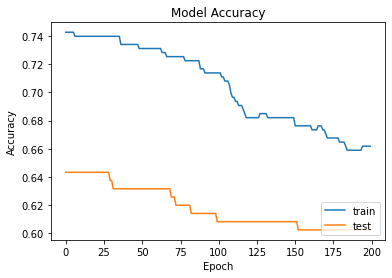

In [62]:
# # summarizaion of history for accuracy

plt.plot(fil_model2.history['accuracy'])
plt.plot(fil_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

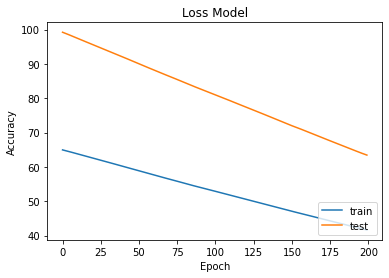

In [63]:
# # summarizaion of history for loss

plt.plot(fil_model2.history['loss'])
plt.plot(fil_model2.history['val_loss'])
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [64]:
# fix random seed for reproducibility
seed3 = 10
np.random.seed(seed3)

In [65]:
# creating model with ["sigmoid" and "logistic"]

model3 = Sequential() # 0 level
model3.add(Dense(14, input_dim=9,  activation='relu')) # FIRST LAYER
model3.add(Dense(9,  activation='sigmoid')) #2nd layer
model3.add(Dense(1, activation='tanh')) #3rd layer or op layer

In [66]:
# Compile model
# chaging optimizer older=adadelta/ada, new=adagrad

model3.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [67]:
# Fit the model
# Change ephocs

fil_model3=model3.fit(x, y, validation_split=0.33, epochs=300, batch_size=15)

Epoch 1/300
24/24 [==============================] - 1s 11ms/step - loss: 2.0309 - accuracy: 0.3439 - val_loss: 2.7397 - val_accuracy: 0.3918
Epoch 2/300
24/24 [==============================] - 0s 4ms/step - loss: 1.7654 - accuracy: 0.3468 - val_loss: 1.7771 - val_accuracy: 0.3918
Epoch 3/300
24/24 [==============================] - 0s 4ms/step - loss: 1.7254 - accuracy: 0.3468 - val_loss: 1.3888 - val_accuracy: 0.3918
Epoch 4/300
24/24 [==============================] - 0s 4ms/step - loss: 1.5810 - accuracy: 0.3468 - val_loss: 1.1950 - val_accuracy: 0.3918
Epoch 5/300
24/24 [==============================] - 0s 5ms/step - loss: 1.4209 - accuracy: 0.3468 - val_loss: 1.1605 - val_accuracy: 0.3918
Epoch 6/300
24/24 [==============================] - 0s 4ms/step - loss: 1.3774 - accuracy: 0.3468 - val_loss: 1.1328 - val_accuracy: 0.3918
Epoch 7/300
24/24 [==============================] - 0s 4ms/step - loss: 1.3650 - accuracy: 0.3468 - val_loss: 1.1091 - val_accuracy: 0.3918
Epoch 8/300


Epoch 59/300
24/24 [==============================] - 0s 4ms/step - loss: 0.8342 - accuracy: 0.3468 - val_loss: 0.8894 - val_accuracy: 0.3918
Epoch 60/300
24/24 [==============================] - 0s 4ms/step - loss: 0.8329 - accuracy: 0.3468 - val_loss: 0.8878 - val_accuracy: 0.3918
Epoch 61/300
24/24 [==============================] - 0s 4ms/step - loss: 0.8315 - accuracy: 0.3468 - val_loss: 0.8864 - val_accuracy: 0.3918
Epoch 62/300
24/24 [==============================] - 0s 4ms/step - loss: 0.8303 - accuracy: 0.3468 - val_loss: 0.8849 - val_accuracy: 0.3918
Epoch 63/300
24/24 [==============================] - 0s 4ms/step - loss: 0.8290 - accuracy: 0.3468 - val_loss: 0.8836 - val_accuracy: 0.3918
Epoch 64/300
24/24 [==============================] - 0s 4ms/step - loss: 0.8278 - accuracy: 0.3468 - val_loss: 0.8821 - val_accuracy: 0.3918
Epoch 65/300
24/24 [==============================] - 0s 3ms/step - loss: 0.8262 - accuracy: 0.3468 - val_loss: 0.8806 - val_accuracy: 0.3918
Epoch 

24/24 [==============================] - 0s 3ms/step - loss: 0.7752 - accuracy: 0.3468 - val_loss: 0.8337 - val_accuracy: 0.3918
Epoch 117/300
24/24 [==============================] - 0s 4ms/step - loss: 0.7744 - accuracy: 0.3468 - val_loss: 0.8331 - val_accuracy: 0.3918
Epoch 118/300
24/24 [==============================] - 0s 4ms/step - loss: 0.7737 - accuracy: 0.3468 - val_loss: 0.8325 - val_accuracy: 0.3918
Epoch 119/300
24/24 [==============================] - 0s 3ms/step - loss: 0.7730 - accuracy: 0.3468 - val_loss: 0.8318 - val_accuracy: 0.3918
Epoch 120/300
24/24 [==============================] - 0s 4ms/step - loss: 0.7722 - accuracy: 0.3468 - val_loss: 0.8312 - val_accuracy: 0.3918
Epoch 121/300
24/24 [==============================] - 0s 4ms/step - loss: 0.7716 - accuracy: 0.3468 - val_loss: 0.8306 - val_accuracy: 0.3918
Epoch 122/300
24/24 [==============================] - 0s 3ms/step - loss: 0.7708 - accuracy: 0.3468 - val_loss: 0.8300 - val_accuracy: 0.3918
Epoch 123/300

24/24 [==============================] - 0s 4ms/step - loss: 0.7380 - accuracy: 0.3468 - val_loss: 0.8039 - val_accuracy: 0.3918
Epoch 174/300
24/24 [==============================] - 0s 3ms/step - loss: 0.7375 - accuracy: 0.3468 - val_loss: 0.8034 - val_accuracy: 0.3918
Epoch 175/300
24/24 [==============================] - 0s 3ms/step - loss: 0.7369 - accuracy: 0.3468 - val_loss: 0.8030 - val_accuracy: 0.3918
Epoch 176/300
24/24 [==============================] - 0s 3ms/step - loss: 0.7364 - accuracy: 0.3468 - val_loss: 0.8025 - val_accuracy: 0.3918
Epoch 177/300
24/24 [==============================] - 0s 3ms/step - loss: 0.7358 - accuracy: 0.3468 - val_loss: 0.8021 - val_accuracy: 0.3918
Epoch 178/300
24/24 [==============================] - 0s 3ms/step - loss: 0.7353 - accuracy: 0.3468 - val_loss: 0.8017 - val_accuracy: 0.3918
Epoch 179/300
24/24 [==============================] - 0s 4ms/step - loss: 0.7348 - accuracy: 0.3468 - val_loss: 0.8012 - val_accuracy: 0.3918
Epoch 180/300

24/24 [==============================] - 0s 3ms/step - loss: 0.7101 - accuracy: 0.3468 - val_loss: 0.7823 - val_accuracy: 0.3918
Epoch 231/300
24/24 [==============================] - 0s 3ms/step - loss: 0.7097 - accuracy: 0.3468 - val_loss: 0.7820 - val_accuracy: 0.3918
Epoch 232/300
24/24 [==============================] - 0s 3ms/step - loss: 0.7092 - accuracy: 0.3468 - val_loss: 0.7816 - val_accuracy: 0.3918
Epoch 233/300
24/24 [==============================] - 0s 4ms/step - loss: 0.7087 - accuracy: 0.3468 - val_loss: 0.7813 - val_accuracy: 0.3918
Epoch 234/300
24/24 [==============================] - 0s 4ms/step - loss: 0.7083 - accuracy: 0.3468 - val_loss: 0.7810 - val_accuracy: 0.3918
Epoch 235/300
24/24 [==============================] - 0s 3ms/step - loss: 0.7080 - accuracy: 0.3468 - val_loss: 0.7808 - val_accuracy: 0.3918
Epoch 236/300
24/24 [==============================] - 0s 4ms/step - loss: 0.7076 - accuracy: 0.3468 - val_loss: 0.7805 - val_accuracy: 0.3918
Epoch 237/300

24/24 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.3468 - val_loss: 0.7664 - val_accuracy: 0.3918
Epoch 288/300
24/24 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.3468 - val_loss: 0.7662 - val_accuracy: 0.3918
Epoch 289/300
24/24 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.3468 - val_loss: 0.7660 - val_accuracy: 0.3918
Epoch 290/300
24/24 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.3468 - val_loss: 0.7658 - val_accuracy: 0.3918
Epoch 291/300
24/24 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.3468 - val_loss: 0.7655 - val_accuracy: 0.3918
Epoch 292/300
24/24 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.3468 - val_loss: 0.7653 - val_accuracy: 0.3918
Epoch 293/300
24/24 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.3468 - val_loss: 0.7651 - val_accuracy: 0.3918
Epoch 294/300

In [68]:
# Evaluating the Model

score3 = model3.evaluate(x, y)
print("%s: %.2f%%" % (model3.metrics_names[1], score3[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.7100 - accuracy: 0.3617
accuracy: 36.17%


In [69]:
# Visualzation of Training History, metric name and score

model3.metrics_names, score3 , fil_model3.history.keys()

(['loss', 'accuracy'],
 [0.7100375294685364, 0.3617021143436432],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

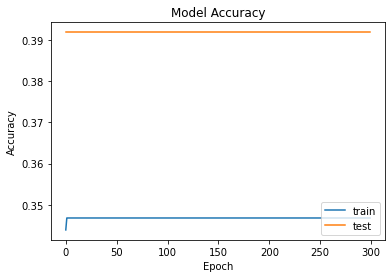

In [70]:
# # summarizaion of history for accuracy

plt.plot(fil_model3.history['accuracy'])
plt.plot(fil_model3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

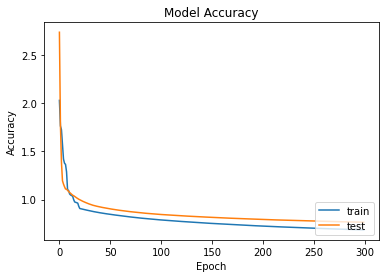

In [71]:
# # summarizaion of history for loss

plt.plot(fil_model3.history['loss'])
plt.plot(fil_model3.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# AS per calcluation "relu" activation function helping to uncrease accuracy